**Sentiment Analysis**

In [2]:
#We will first load all our important libraries that we will be using for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings(action = "ignore")

plt.style.use("ggplot")
import nltk

In [4]:
#Let us load our dataset and observe what story does our data tell?
df1 = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [5]:
#Having a look at our data features
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#Calculating the number of null values in our dataset
df1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df1.shape

(568454, 10)

In [8]:
top_products = df1["ProductId"].value_counts()[:5].sum()

In [10]:
#Wow that is a lot of entries
df2 = df1.head(top_products)
df2.shape

(3441, 10)

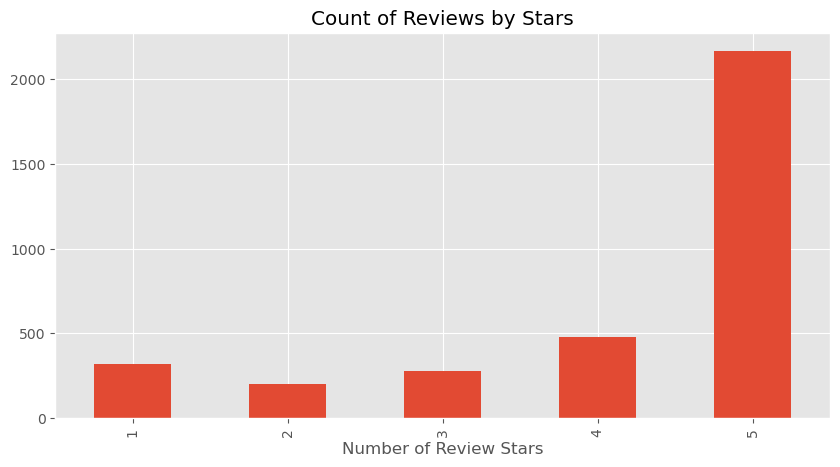

In [11]:
star_review = df2["Score"].value_counts().sort_index().plot(kind = "bar",
     title = "Count of Reviews by Stars",
     figsize = (10, 5))
star_review.set_xlabel("Number of Review Stars")
plt.show()

In [12]:
#There are a lot of 5 star reviews over the amazon website
#Let us randomly check a few text examples
for i in range(5):
    b = "."
    example = df2["Text"][np.random.randint(100)]
    print(f"{i + 1}{b}", example, "\n")

1. The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap... 

2. I have used the endurolyte product for several years in both pill and powder form.  Long desert rides on the dirt bike always found my camelbak water heavily laced with the endurolyte powder, not overly tasty, but quite effective, as I never got a cramp on these several hundred mile rides.  Same for desert racing in the buggy, the came

In [13]:
#There are some HTML tags there too
#Let us now try tokenizing
tokens = nltk.word_tokenize(example)
tokens[:10]

['It', 'is', 'okay', '.', 'I', 'would', 'not', 'go', 'out', 'of']

In [14]:
tagged_ = nltk.pos_tag(tokens)
tagged_[:10]

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('okay', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('go', 'VB'),
 ('out', 'IN'),
 ('of', 'IN')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged_)
entities.pprint()

(S
  It/PRP
  is/VBZ
  okay/JJ
  ./.
  I/PRP
  would/MD
  not/RB
  go/VB
  out/IN
  of/IN
  my/PRP$
  way/NN
  to/TO
  buy/VB
  it/PRP
  again/RB)


In [16]:
#Using the VADER Sentiment Scoring approach for the project
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/3441 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df2, how='left')

In [20]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


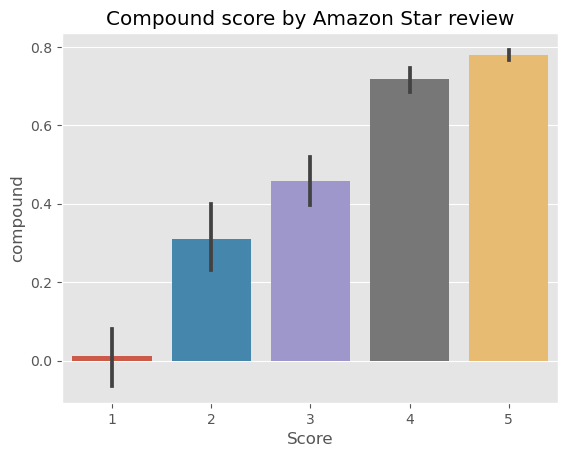

In [21]:
#Plotting the results so obtained
ax = sns.barplot(data = vaders, x = "Score",y = "compound")
ax.set_title("Compound score by Amazon Star review")
plt.show()

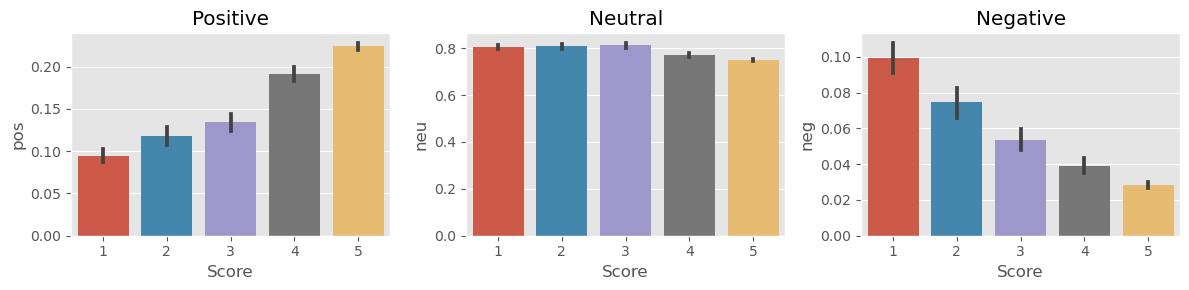

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [23]:
vaders["ProductId"]

0       B001E4KFG0
1       B00813GRG4
2       B000LQOCH0
3       B000UA0QIQ
4       B006K2ZZ7K
           ...    
3436    B005K4Q1VI
3437    B005K4Q1VI
3438    B005K4Q1VI
3439    B005K4Q1VI
3440    B005K4Q1VI
Name: ProductId, Length: 3441, dtype: object

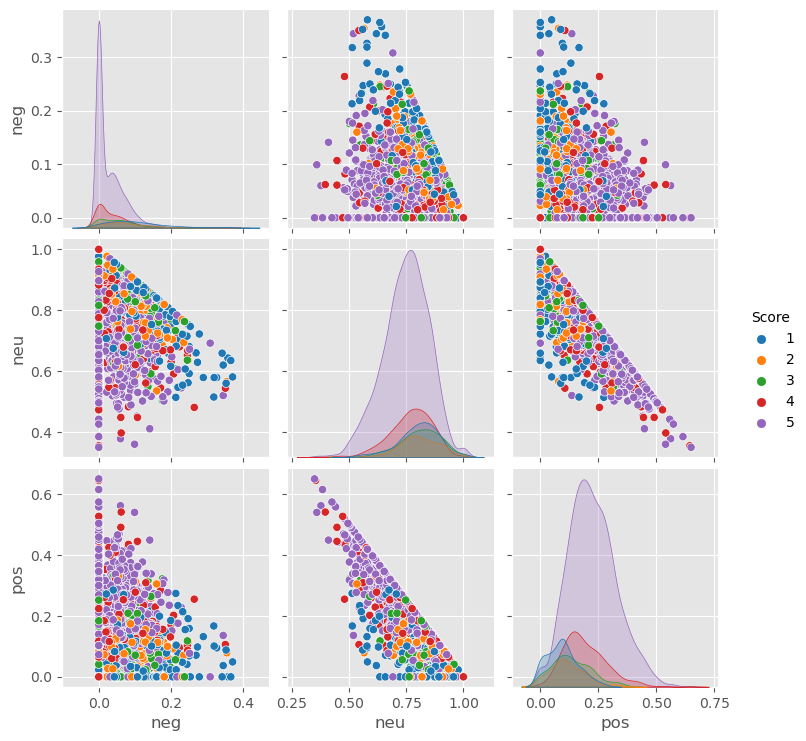

In [24]:
sns.pairplot(data = vaders,vars = ["neg", "neu", "pos"], hue = "Score",palette = "tab10")

In [25]:
vaders["Aggregate"]  = vaders["neg"]* (-1) + vaders["neu"]*0.2 + vaders["pos"] * 1 

In [26]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Aggregate
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.4440
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.1596
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.2148
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.2000
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.5584


In [29]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(vaders["compound"], vaders["Score"])

In [31]:
print("Correlation coefficient is:", correlation_coefficient, "P value is: ", p_value)

Correlation coefficient is: 0.5132719411017799 P value is:  1.199982381463611e-230


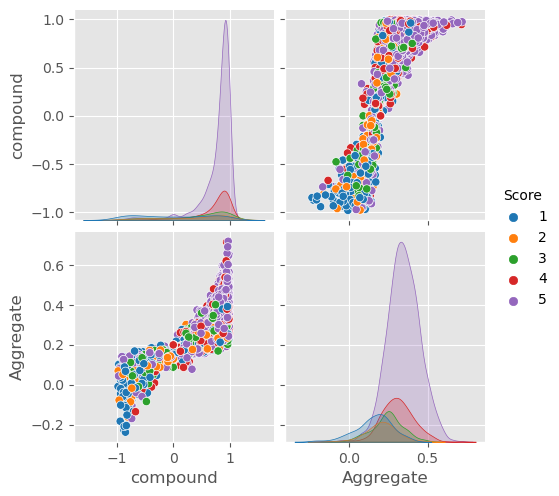

In [34]:
sns.pairplot(data = vaders,vars = ["compound", "Aggregate"] ,hue = "Score", palette = "tab10")